# Evaluating an ML Model

In this notebook, we'll learn how to load and analyse a simple dataset, and to train and evaluate a basic model.

## The Weather Dataset

To make things easier for you, the following cell downloads a dataset from the web and extracts it:



In [ ]:
!rm weather_dataset.csv
!wget https://raw.githubusercontent.com/ghomasHudson/Neural-Networks-for-Research-Workshop/refs/heads/main/01_Basics_of_ML/weather_dataset.csv

The data is stored in a CSV (Comma-Separated Values) format. You can open it in a spreadsheet program e.g. Excel if you like! We can load many data formats into Python but csv is a common one.

For now, let's use the pandas library to load the file into this notebook:

In [ ]:
import pandas as pd
df = pd.read_csv("weather_dataset.csv")
display(df)

In order to fairly evaluate the model's performance, we need to make seperate training and testing sets. Lets split the weather dataset into 2 sets:

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {len(df_train)}")
print(f"Testing set size: {len(df_test)}")

## Investigating the dataset
Let's make some plots of the data so we can get a feel of what our dataset consists of.

First lets check out what proportion of the days are good for picnics:

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('picnic_weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

As expected for the UK, most of the days are not good picnic weather! This is important to consider later when we come to evaluation - our dataset is quite unbalanced.

On Google Colab, when you display a pandas dataframe you will get a suggestion to "View recommended plots", e.g:

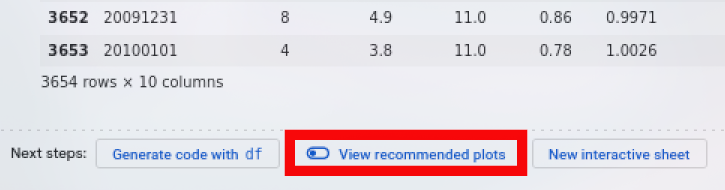

You might want to try scrolling up to the cell with the table and visualize some of the other columns - are there any interesting patterns?

# A Simple Model
In this section, we'll train a simple model to decide whether we should have a picnic given the weather conditions. We wont focus on how the model works yet - just how we can train and evaluation different approaches.

The [sklearn](https://scikit-learn.org/stable/) library has some utility tools and very simple models. Let's train one on our data:

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(df_train[['cloud_cover', 'wind_speed', 'wind_gust', 'humidity', 'pressure', 'precipitation', 'sunshine', 'temp_mean']], df_train['picnic_weather'])

We can now use the test set to see how well the model does. Lets compute some evaluation metrics:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(df_test[['cloud_cover', 'wind_speed', 'wind_gust', 'humidity', 'pressure', 'precipitation', 'sunshine', 'temp_mean']])

accuracy = accuracy_score(df_test['picnic_weather'], y_pred)
precision = precision_score(df_test['picnic_weather'], y_pred)
recall = recall_score(df_test['picnic_weather'], y_pred)
f1 = f1_score(df_test['picnic_weather'], y_pred)

print(classification_report(df_test['picnic_weather'], y_pred))
print()
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Looks good - we can decide whether to go for a picnic with over 97% accuracy!

Try it out. Edit the numbers below and see what the model predicts for different conditions:

In [ ]:
example = pd.DataFrame([{
    "cloud_cover": 10,
    "wind_speed": 2,
    "wind_gust": 1,
    "humidity": 99,
    "pressure": 20,
    "precipitation": 10,
    "sunshine": 100,
    "temp_mean": 32
}])


pred = model.predict(example)
print("output:", "Picnic Weather" if pred else "Not Picnic Weather")

# Analysing some more models

I've built some different models on the same data - which one is best? Write some code using the stuff from the previous section as inspiration to compare the labels (`df_test['picnic_weather']`) to the model predictions (`y_pred`).

In [ ]:
#@title Models defined in this cell (look at them only after you've evaluated them!)
import random
random.seed(42)
model_predictions = [
    [random.random() > 0.98 for _ in range(len(df_test))],
    [random.choice([True, False]) for _ in range(len(df_test))],
    [x if random.random() > 0.6 else True for x in df_test["picnic_weather"]]
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

for i, y_pred in enumerate(model_predictions):
  print("-"*60)
  print(f"MODEL {i+1}")

  # WRITE YOUR CODE HERE
  # compare the labels (df_test['picnic_weather']), to the model predictions (y_pred)
  # e.g. metric_score = metric_name(df_test['picnic_weather'], y_pred)
  print("Write code to output metrics here")

Make sure you try multiple metrics - what do they tell you about the models? Once you've formed an opinion, take a look at what the models are doing behind the scenes.

# Additional Exercises
- In this notebook, we've looked at the simplest case - binary classification. Find a multiclass dataset and repeat the same analysis. You will need to modify the models and the evaluation metrics to support this. You also might want to consider generating a confusion matrix.
- We only looked at classification here (as it's one of the most common tasks), but we also need to evaluation regresssion and other kinds of outputs (e.g. image generation, text outputs). Investigate how these can be evaluated too.